In [ ]:
# importing required libraries of opencv
import cv2
from PIL import Image 
# importing library for plotting
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.metrics import  confusion_matrix


In [ ]:
#FROM TASK 4
def QuantFunc(img,IQ):
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            value = (IQ* np.floor((img[i][j]/IQ)))
            img[i][j]=value
    return img

In [ ]:
class BayesModel:
  def __init__(self,dta,gt):
    self.gt=gt
    self.dta=dta
    self.gt_shape=self.gt.shape
    self.dta_shape=self.dta.shape
    self.gt=self.gt.flatten()
    self.count0=0
    self.count1=0
    self.R=np.zeros((16,2))
    self.G=np.zeros((16,2))
    self.B=np.zeros((16,2))
    self.vector_size=self.gt_shape[0]*self.gt_shape[1]
    self.training_set_indices=np.array(list(range(0,self.vector_size)))
    self.training_set_indices=np.random.choice(self.training_set_indices,math.floor(self.vector_size*0.8))
    self.testing_set_indices=[]
    self.labels = np.ones(self.vector_size)*-1
    for i in range(self.vector_size):
      if not(i in self.training_set_indices):
        self.testing_set_indices.append(i)
    self.testing_set_indices=np.array(self.testing_set_indices)
  def trainingData(self):
    for i in self.training_set_indices:
      if self.gt[i]==0:
        self.count0+=1
        self.R[int(self.dta[i,0]/16),0]+=1
        self.G[int(self.dta[i,0]/16),0]+=1
        self.B[int(self.dta[i,0]/16),0]+=1
      else:
        self.count1+=1
        self.R[int(self.dta[i,0]/16),1]+=1
        self.G[int(self.dta[i,0]/16),1]+=1
        self.B[int(self.dta[i,0]/16),1]+=1
  def testingData(self):
    binary_img=self.gt
    for i in self.testing_set_indices:
      pixel = self.dta[i]
      pixel_0=(self.R[int(pixel[0]/16),0]/self.count0)*(self.G[int(pixel[1]/16),0]/self.count0)*(self.B[int(pixel[2]/16),0]/self.count0)
      pixel_1=(self.R[int(pixel[0]/16),1]/self.count1)*(self.G[int(pixel[1]/16),1]/self.count1)*(self.B[int(pixel[2]/16),1]/self.count1)
      if pixel_0 > pixel_1:
        binary_img[i]=0
      else:
        binary_img[i]=255
    return binary_img


In [ ]:
def Calculate_ConfMatrix(gt,lbl):
    gt=gt.flatten()
    lbl=lbl.reshape(gt_shape).flatten()
    Truezero=0
    True255s=0
    Falsezero=0
    False255s=0
    for i in range(len(gt)):
        if(gt[i]==0)& (lbl[i]==0):
            Truezero+=1
        if(gt[i]==255)& (lbl[i]==255):
            True255s+=1
        if(gt[i]==255)& (lbl[i]==0):
            False255s+=1
        if(gt[i]==0)& (lbl[i]==255):
            Falsezero+=1
    confusion_matrix=np.matrix([[Truezero,Falsezero ], [False255s, True255s]])
    plt.matshow(confusion_matrix,cmap="Blues")
    for i in range(0,confusion_matrix.shape[0]):
        for j in range(0,confusion_matrix.shape[1]):
            plt.annotate(confusion_matrix[i,j],(j,i))




    
    

    

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255   0]]
8


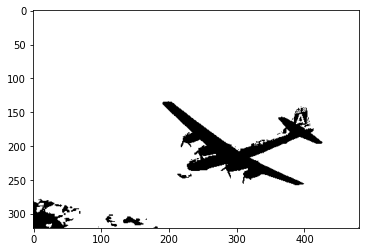

In [ ]:
#reading the image 
img = cv2.imread('dataset2Color.jpg')
gt = np.array(Image.open('dataset2Gray.jpg'))

#Qunatizing Function Using The quantizied 
original_shape=img.shape
gt_shape=gt.shape
img=QuantFunc(img,16).astype(int)
#Reshaping the img
img=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
img
# Applying the Otsu Threshold
ret, thresh = cv2.threshold(gt, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh)
print(cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Applying Naive Bayes Model 
nb=BayesModel(img,thresh)
nb.trainingData()
pred_binary_img=nb.testingData()
#plt.imshow(pred_binary_img.reshape(gt_shape),cmap='gray')

plt.imshow(thresh,cmap='gray')

In [ ]:
# unique, counts = np.unique(thresh.flatten(), return_counts=True)
# dict(zip(unique, counts))

In [ ]:
# unique, counts = np.unique(pred_binary_img.reshape(gt_shape).flatten(), return_counts=True)
# dict(zip(unique, counts))

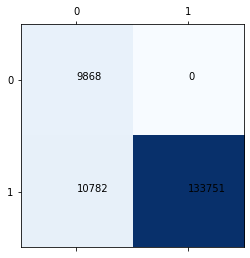

In [ ]:
Calculate_ConfMatrix(thresh,pred_binary_img)